In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者 ['Microsoft YaHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False

d2l.use_svg_display()#用svg显示图片，它的作用是设置后续由 Matplotlib 库生成的图像以 SVG 格式显示。

In [3]:
trans= transforms.ToTensor()
minist_train = torchvision.datasets.FashionMNIST(root='E:/深度学习/李沐动手学/数据集/mnist/',
                                           train=True,
                                           download=True,
                                           transform=trans)
minist_test = torchvision.datasets.FashionMNIST(root='E:/深度学习/李沐动手学/数据集/mnist/',
                                           train=False,
                                           download=True,
                                           transform=trans)


In [4]:
len(minist_train)

60000

In [5]:
len(minist_test)

10000

In [6]:
minist_train[0][0].shape#第一张图片的形状

torch.Size([1, 28, 28])

In [7]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = [
        "T恤", "裤子", "套头衫", "连衣裙", "外套",
        "凉鞋", "衬衫", "运动鞋", "包", "靴子"
    ]
    return [text_labels[int(i)] for i in labels]


In [ ]:
def show_images(images, num_rows, num_cols, titles=None, scale=1.5):
    """显示Fashion-MNIST图像及其标签"""  # <-- 这是函数的文档字符串 (docstring)，解释了函数的作用

    # 1. 计算图像网格的总体尺寸
    figsize=(num_cols * scale, num_rows * scale)

    # 2. 创建一个包含多个子图（Axes）的图窗（Figure）
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)

    # 3. 将二维的子图数组扁平化为一维数组，方便遍历
    axes = axes.flatten()

    # 4. 遍历图像和对应的子图，并逐个显示
    for i, (ax, img) in enumerate(zip(axes, images)):
        # 4a. 判断图像数据类型
        if torch.is_tensor(img):
            # 4b. 如果是 PyTorch 张量，转换为 NumPy 数组后显示
            ax.imshow(img.numpy())
        else:
            # 4c. 如果是 NumPy 数组等其他格式，直接显示
            ax.imshow(img)
        
        # (这里缺少了显示标题和关闭坐标轴的代码，但我们可以补充解释)
        # ax.axes.get_xaxis().set_visible(False) # 隐藏 x 轴
        # ax.axes.get_yaxis().set_visible(False) # 隐藏 y 轴
        if titles:
            ax.set_title(titles[i]) # 设置标题

In [ ]:
X,y=next(iter(DataLoader(minist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,3,titles=get_fashion_mnist_labels(y))
#这里只是打印看看

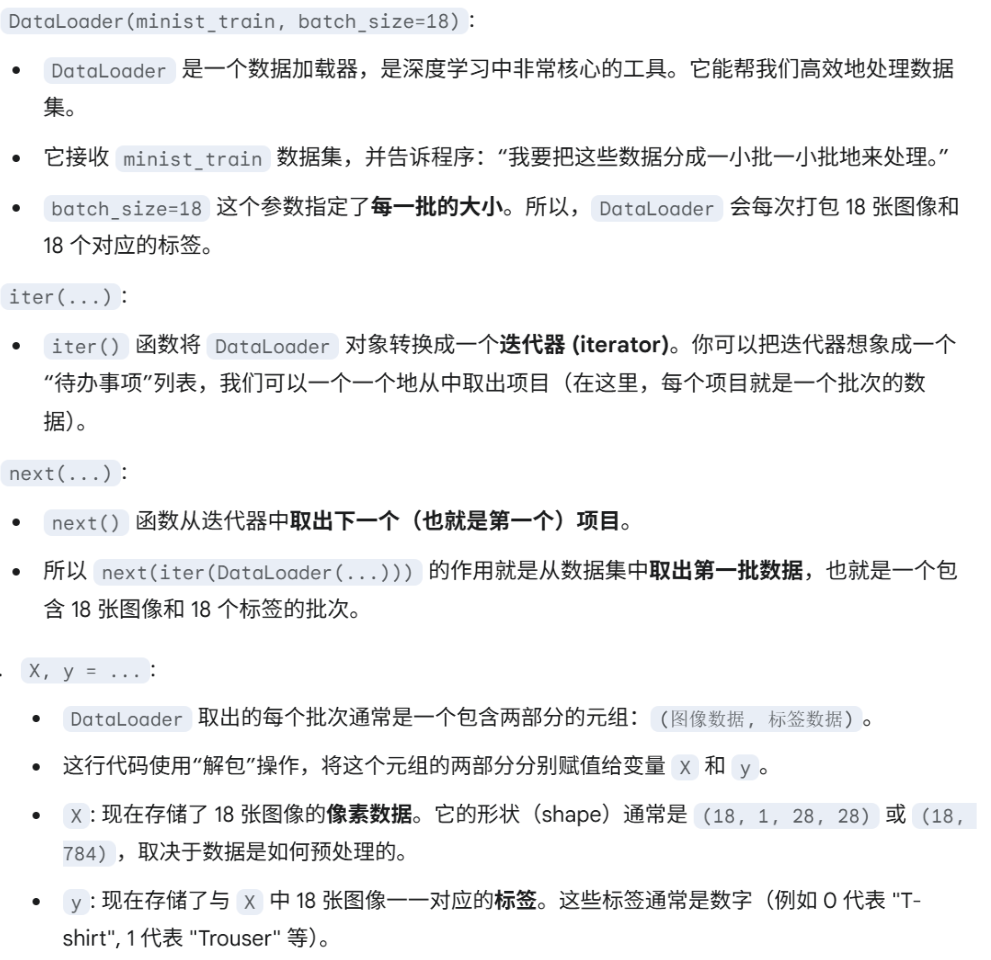

In [ ]:
batch_size = 256

def get_dataloader_workers():
    """使用进程来读取的数据。"""
    return 0

train_iter = data.DataLoader(minist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue

f'{timer.stop():.2f} sec'

for X, y in train_iter: continue

含义: 这是一个 for 循环，它会遍历 train_iter 中的每一个数据批次。

for X, y in train_iter:: 在每次循环中，train_iter 会产生一个批次的数据，这是一个元组 (图像数据, 标签数据)。这个元组被自动解包到变量 X 和 y 中。X 会包含 256 张图像的张量，y 会包含对应的 256 个标签的张量。

continue: 这是循环体的内容。continue 语句的作用是立即结束本次循环，并直接进入下一次循环。

关键目的: 因为循环体里只有 continue，所以代码没有对加载出来的数据 X 和 y 做任何处理（比如模型计算、损失函数计算等）。这个循环的唯一目的就是驱动 train_iter 将整个数据集从头到尾加载一遍。

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集并返回数据迭代器。"""
    transform = [transforms.ToTensor()]
    if resize:
        transform.insert(0,transforms.Resize(resize))
    transform = transforms.Compose(transform)

    minist_train = torchvision.datasets.FashionMNIST(root='E:/深度学习/李沐动手学/数据集/mnist/',
                                           train=True,
                                           download=True,
                                           transform=transform)
    minist_test = torchvision.datasets.FashionMNIST(root='E:/深度学习/李沐动手学/数据集/mnist/',
                                           train=False,
                                           download=True,
                                           transform=transform)

    train_iter = DataLoader(minist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())
    test_iter = DataLoader(minist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers())

    return train_iter, test_iter


if resize::这是一个条件判断语句。

resize 是函数的参数，默认值可能是 None。这条语句检查调用函数时是否为 resize 参数提供了一个具体的值（例如，一个整数 64 或一个元组 (96, 96)）。

目的: 让这个函数变得更灵活。用户可以选择是否在加载数据时统一调整所有图像的尺寸。例如，Fashion-MNIST 的原始图像是 28x28 像素，但有些模型可能需要更大尺寸的输入，比如 224x224。

transform.insert(0, transforms.Resize(resize))
这行代码在 if resize: 条件为真时执行。

transform.insert(0, ...): 这是 Python 列表的方法。

insert() 用于在列表的指定位置插入一个元素。

第一个参数 0 表示插入到列表的最开始位置。

transforms.Resize(resize):

这是 torchvision.transforms 中的另一个类，用于调整图像的尺寸。

resize 参数就是用户传入的期望尺寸。例如，如果调用函数时写了 resize=96，那么这里就是 transforms.Resize(96)，它会将图像的短边缩放到 96 像素，长边按比例缩放。

为什么用 insert(0, ...)?:

预处理操作的顺序非常重要。Resize 操作通常应该在 ToTensor 之前进行。因为 Resize 通常作用于 PIL Image 对象，而 ToTensor 会将图像转换为张量。一旦变成了张量，再进行尺寸调整会更复杂。

所以，通过 insert(0, ...)，我们将尺寸调整操作放在了列表的最前面，确保它第一个被执行。

执行后，transform 列表变为：[transforms.Resize(resize), transforms.ToTensor()]。

transform = transforms.Compose(transform)
transforms.Compose(...): 这是 torchvision.transforms 中一个非常重要的工具。

它的作用是将一个包含多个转换操作的列表“串”起来，组合成一个单一的、连贯的转换管道（pipeline）。

工作原理: 当你把一个图像喂给由 Compose 创建的 transform 对象时，图像会按照列表中的顺序依次经过每一个转换操作。

如果 resize 被指定，图像会先经过 Resize，再经过 ToTensor。

如果 resize 未指定，图像会直接经过 ToTensor。

transform = ...: Compose 会返回一个新的、可调用的对象，我们用它来更新 transform 变量。现在，transform 不再是一个列表，而是一个单一的转换对象，可以直接用在 DataLoader 中。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
#nn.Sequential：这是一个有序的容器。数据会严格按照你放入其中各层（Modules）的顺序，依次通过。
#nn.Flatten()它的唯一作用就是将输入张量“展平”。
#它等同于我们之前手动实现的 X.reshape((-1, 784))。
# 它会把一个多维的输入张量例如，一个 [批量大小, 1, 28, 28] 的图像张量）转换成一个二维张量 [批量大小, 784]，以便能够被送入后续的全连接层。
#nn.Linear(in_features, out_features)
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

#normal_: 这个函数用于从正态分布中抽取随机数来填充张量。
# #注意函数名末尾的下划线 _，这是 PyTorch 的一个约定，
# #表示这是一个原地（in-place）操作，即它会直接修改 m.weight 的值，
# 而不是返回一个新的张量。
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
#std=0.01: 这是传递给 normal_ 函数的参数，
# 指定了正态分布的标准差为 0.01（均值默认为 0）。

#当这个函数与 net.apply() 结合使用时，
#参数 m 将代表 net 中的每一个模块
#（包括 nn.Sequential 容器本身、nn.Flatten 层和 nn.Linear 层）。
net.apply(init_weights)
#代码检查传入的模块 m 的类型是否正好是 nn.Linear。
# 我们只想初始化线性层的权重，而像 nn.Flatten 这样的层是没有权重的，
# 所以需要通过这个判断来跳过它们。

loss = nn.CrossEntropyLoss()


trainer = torch.optim.SGD(net.parameters(), lr=0.1)


num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
"""
这行定义了函数 train_epoch_ch3，它接收四个参数：
net: 要训练的神经网络模型（一个 nn.Module 对象）。
train_iter: 训练数据集的迭代器（Data Loader）。它会在每次迭代时产出一批（batch）训练数据 (X, y)。
loss: 损失函数，例如 nn.CrossEntropyLoss，用于计算模型预测与真实标签之间的差距。
updater: 更新器（优化器）。这可以是一个标准的 PyTorch 优化器（如 torch.optim.SGD），也可以是一个自定义的更新函数。
"""
def train_epoch_ch3(net, train_iter, loss, updater):
    # 检查变量 net 是否是 torch.nn.Module 类的实例。
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # 使用自定义的优化器
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics

从0开始实现


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l 


batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs = 784
num_outputs = 10
#torch.normal()：这个函数根据正态分布（Normal distribution）随机生成张量（Tensor）。
#0：表示正态分布的均值（mean）为 0。
#0.01：表示正态分布的标准差（standard deviation）为 0.01。这是一种常见的初始化策略，有助于避免在训练初期梯度过大或过小的问题。
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

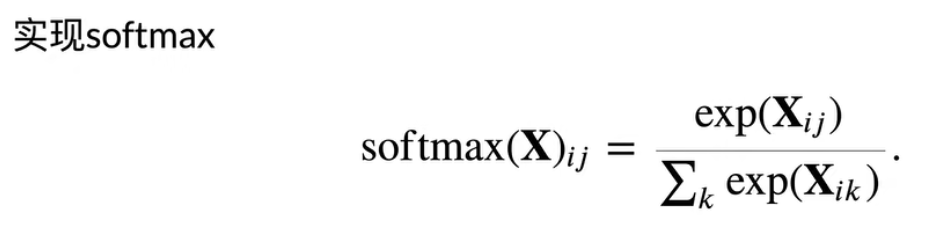

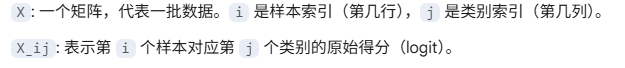

求和 (Σ): 对于同一个样本 i，我们将它对应所有类别 k 的指数结果全部加起来。

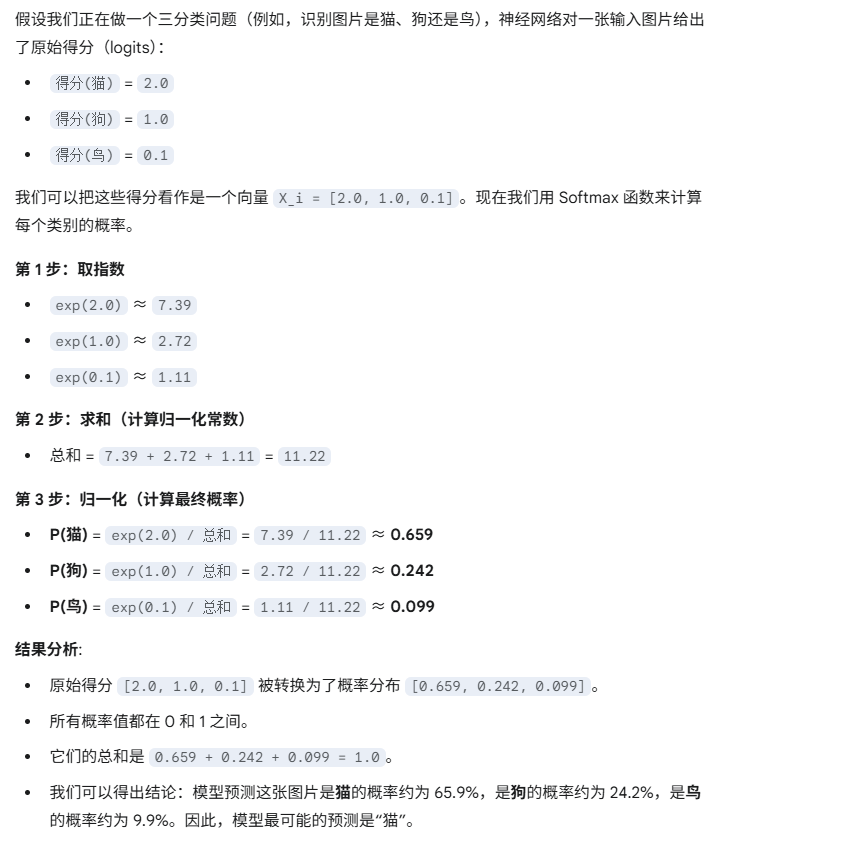

In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition 

这里的 1 指的是第二个维度（即列）。例如，如果 X 的形状是 (batch_size, num_outputs)，那么 sum(1, ...) 就会对每个样本（行）的所有输出值进行求和。它确保求和后，结果的维度保持和原始张量一致。例如，如果 X_exp 的形状是 (2, 10)，对维度 1 求和后，如果 keepdim=False，结果的形状会变成 (2)；而 keepdim=True 会使结果的形状变为 (2, 1)。这对于后面的除法运算（广播机制）至关重要。

partition: 这个变量代表了每个样本的归一化常数，也就是所有指数化后的值的总和。

In [ ]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)
"""
torch.matmul(): 这个函数执行矩阵乘法（matrix multiplication）。

左边的输入是展平后的数据，形状是 (batch_size, 784)。

右边的输入是权重矩阵 W，形状是 (784, 10)。

矩阵乘法的结果是一个新的张量，其形状为 (batch_size, 10)。这个结果通常被称为线性模型的输出或者logits。

这一步的作用： 实现了线性模型的计算，即 XW。它将每个输入样本的 784 个特征与权重矩阵 W 相乘，得到一个包含 10 个值的输出向量，每个值代表一个类别的得分。

"""

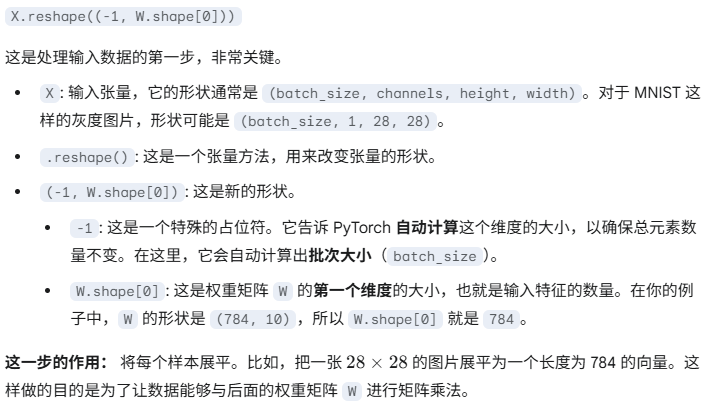

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

len:
- 字符串（String）：返回字符串中字符的数量。
- 列表（List）：返回列表中元素的数量
- 元组（Tuple）：返回元组中元素的数量
- 字典（Dictionary）：返回字典中键值对的数量。
- 集合（Set）：返回集合中元素的数量。
- PyTorch 张量（Tensor）：如果张量是一维的，len() 返回元素的数量。如果张量是多维的，len() 返回第一个维度的大小。


len(y_hat.shape) 返回的是 y_hat 张量维度的数量。例如，一个形状为 (100, 10) 的张量，y_hat.shape 是一个元组 (100, 10)，len(y_hat.shape) 返回 2。而一个形状为 (100,) 的张量，len(y_hat.shape) 返回 1。

len(y_hat.shape) > 1: 检查 y_hat 是否是二维或更高维的张量。例如，y_hat 的形状可能是 (batch_size, num_classes)。

y_hat.shape[1] > 1: 检查 y_hat 的第二个维度（列）的大小是否大于 1。如果模型的输出是像 [0.1, 0.2, 0.7] 这样的概率向量，那么 y_hat.shape[1] 就是 3，这个条件就会成立。

y_hat.argmax(axis=1): 这个方法返回指定维度（axis=1）上最大值的索引。

对于一个批次的概率分布，比如 [[0.1, 0.8, 0.1], [0.9, 0.05, 0.05]]，argmax(axis=1) 会逐行找出最大值的索引。

第一行的最大值是 0.8，它的索引是 1。

第二行的最大值是 0.9，它的索引是 0。

所以，这一步的结果是 [1, 0]，代表模型预测的类别分别是 1 和 0。

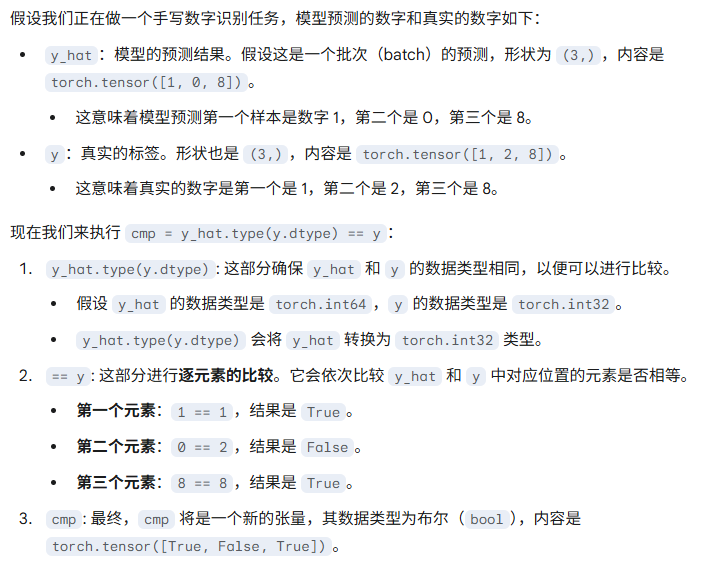
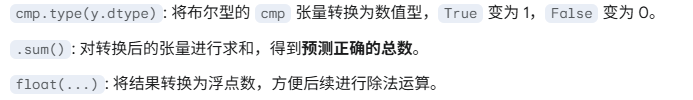

In [ ]:
def accuracy(y_hat, y):
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

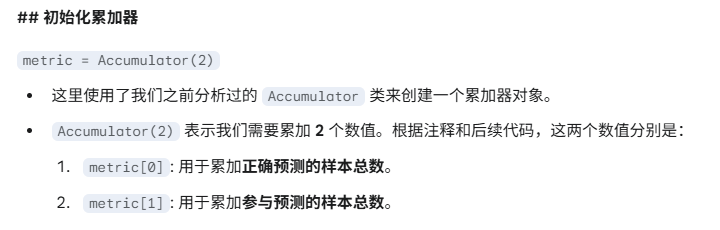

.numel() 是 PyTorch 张量的一个方法，用于返回张量中元素的总数量。对于标签向量 y 来说，这其实就是当前批次的大小（batch size）。

In [ ]:
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

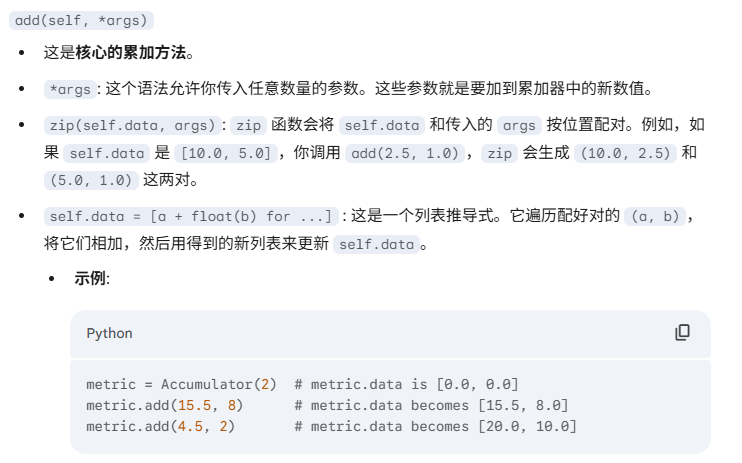

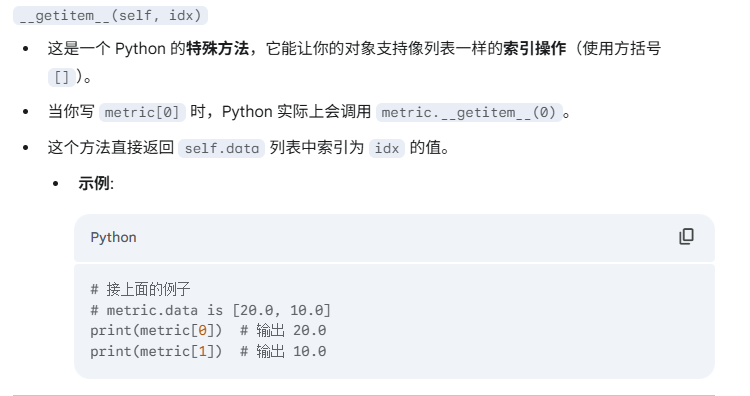

In [ ]:
class Accumulator:
    """
    当你创建一个 Accumulator 对象时（例如 metric = Accumulator(3)），这个方法会被调用。

n: 你想同时累加的变量的数量。

self.data = [0.0] * n: 它会创建一个包含 n 个元素的列表，并将所有元素初始化为 0.0。这个列表就是用来存储累加结果的地方。

例如，Accumulator(3) 会创建 self.data = [0.0, 0.0, 0.0]
    """
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
#这个方法用于重置累加器
    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

evaluate_accuracy(net, test_iter)

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # 使用自定义的优化器
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 1],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics

In [ ]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

In [ ]:
def predict_ch3(net, test_iter, n=6):
    """预测标签（定义见第3章）。"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)